<a href="https://colab.research.google.com/github/hurileborjigin/pytorch_notes/blob/main/FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Feedforward neural network
- 1. MNIST Dataset
- 2. DataLoader, Transformation
- 3. Multi-layer neural net
- 4. Loss and Optimizer
- 5. Training loop
- 6. Model evaluation
- 7. GPU

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
device

device(type='cuda')

In [5]:
# hyperparameters
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 20
batch_size = 100
learning_rate = 0.001

torch.Size([100, 1, 28, 28]) torch.Size([100])


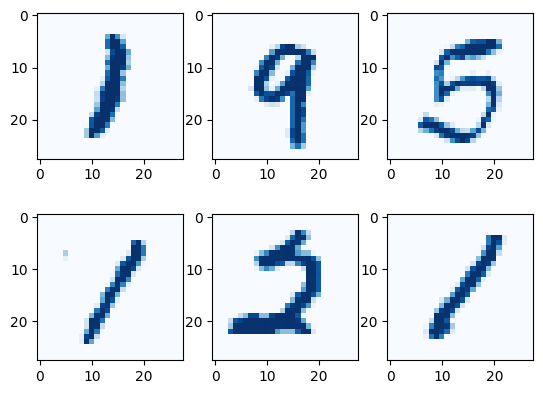

In [11]:
# Prepare the dataset
train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_data = torchvision.datasets.MNIST('./data', train=False, transform=transforms.ToTensor())


train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(samples[i][0], cmap='Blues')

In [12]:
# Create the model
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super().__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, X):
    out = self.l1(X)
    out = self.relu(out)
    out = self.l2(out)
    return out

In [14]:
# Create an instance of the model, and define loss and optimizer
model = NeuralNet(input_size, hidden_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [15]:
# Training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i, (image, labels) in enumerate(train_loader):
    # reshape the images
    images = image.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    # forward pass
    outputs = model(images)

    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i + 1) % 100 == 0:
      print(f'Epoch: {epoch + 1}/{num_epochs}, Step: {i+1}/{n_total_steps}, Loss: {loss.item():.4f}')


Epoch: 1/20, Step: 100/600, Loss: 0.3944
Epoch: 1/20, Step: 200/600, Loss: 0.3027
Epoch: 1/20, Step: 300/600, Loss: 0.2738
Epoch: 1/20, Step: 400/600, Loss: 0.3238
Epoch: 1/20, Step: 500/600, Loss: 0.3517
Epoch: 1/20, Step: 600/600, Loss: 0.1800
Epoch: 2/20, Step: 100/600, Loss: 0.1521
Epoch: 2/20, Step: 200/600, Loss: 0.2328
Epoch: 2/20, Step: 300/600, Loss: 0.2410
Epoch: 2/20, Step: 400/600, Loss: 0.1633
Epoch: 2/20, Step: 500/600, Loss: 0.2144
Epoch: 2/20, Step: 600/600, Loss: 0.1322
Epoch: 3/20, Step: 100/600, Loss: 0.0769
Epoch: 3/20, Step: 200/600, Loss: 0.1738
Epoch: 3/20, Step: 300/600, Loss: 0.0930
Epoch: 3/20, Step: 400/600, Loss: 0.0640
Epoch: 3/20, Step: 500/600, Loss: 0.2072
Epoch: 3/20, Step: 600/600, Loss: 0.1113
Epoch: 4/20, Step: 100/600, Loss: 0.0504
Epoch: 4/20, Step: 200/600, Loss: 0.1569
Epoch: 4/20, Step: 300/600, Loss: 0.0888
Epoch: 4/20, Step: 400/600, Loss: 0.1386
Epoch: 4/20, Step: 500/600, Loss: 0.0845
Epoch: 4/20, Step: 600/600, Loss: 0.0815
Epoch: 5/20, Ste

In [19]:
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)

    # torch.max() returns value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()

  acc = 100 * n_correct / n_samples
  print(f'Accuracy: {acc}%')

Accuracy: 97.78%
